In [1]:
import vit
from load_dataset import Yoga82
import cv2
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

In [2]:
dataset = Yoga82()

 79%|███████▉  | 65/82 [02:50<00:46,  2.74s/it]c:\Users\felip\anaconda3\envs\vit\lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 82/82 [03:32<00:00,  2.59s/it]

Dataset Total: 20263/28276


c:\Users\felip\anaconda3\envs\vit\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Shape: (3, 180, 180)
Label: 0 (Akarna_Dhanurasana)


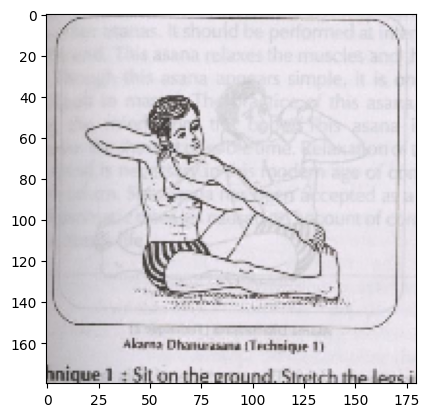

In [3]:
idx = 1

print(f'Shape: {dataset[idx][0].cpu().numpy().shape}')
plt.imshow(dataset[idx][0].cpu().numpy().transpose(1,2,0))
label = dataset[idx][1]
print(f'Label: {label} ({dataset.get_class_name(label)})')

In [4]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [6]:
config = {
    'img_size':180,
    'img_channels':3,
    'patch_size':16,
    'hidden_size':48,
}

patch_embedding = vit.PatchEmbedding(config).to('cuda')

In [7]:
patch_embedding(dataset[idx][0].to(torch.float)).size()

torch.Size([48, 11, 11])

In [8]:
for batch in dataloader:
    # batch contendrá un lote de datos que puedes utilizar para entrenar tu modelo
    input_data = batch[0].to('cuda').to(torch.float)
    target_data = batch[1].to('cuda').to(torch.float)
    print(input_data.size())
    print(patch_embedding(input_data).size())
    break
    # Aquí irían las operaciones de entrenamiento

torch.Size([1, 3, 180, 180])
torch.Size([1, 121, 48])


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda
